$
Assignment 3
$
<br>
$
\Huge Name-S.P.Prathapasinghe
$
<br>
$
Index No.-190470X
$
<br>
$
Github Link-https://github.com/PrathapasingheSP99/Image-Processing.git
$

## 1.Open the hexnut_template.png, squarenut_template.png and conveyor_f100.png and display.


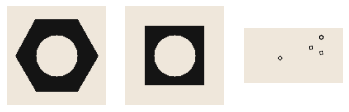

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


hexnut_template = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt. subplots(1,3)
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR));ax[0].axis('off')
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR));ax[1].axis('off')
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR));ax[2].axis('off')

plt.show()

## 2.Convert the images to grayscale and apply Otsu's thresholding to obtain the binarized image.

The threshold value automatically selected for hexanut is 20.
The threshold value automatically selected for squarenut is 20.
The threshold value automatically selected for conveyor_f100 is 20.


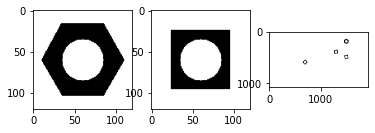

In [2]:
Gray_hexanut=cv.cvtColor(hexnut_template,cv.COLOR_RGB2GRAY)
Gray_squarenut=cv.cvtColor(squarenut_template,cv.COLOR_RGB2GRAY)
Gray_conveyor=cv.cvtColor(conveyor_f100,cv.COLOR_RGB2GRAY)

Otsu_hexanut,th_hexa = cv.threshold(Gray_hexanut,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
Otsu_squarenut,th_sqre = cv.threshold(Gray_squarenut,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
Otsu_convayor,th_conv = cv.threshold(Gray_conveyor,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)


print("The threshold value automatically selected for hexanut is %d."%Otsu_hexanut)
print("The threshold value automatically selected for squarenut is %d."%Otsu_squarenut)
print("The threshold value automatically selected for conveyor_f100 is %d."%Otsu_convayor)
fig, ax = plt. subplots(1,3)
ax[0].imshow(th_hexa,'gray')
ax[1].imshow(th_sqre,'gray')
ax[2].imshow(th_conv,'gray')
plt.show()

## 3.Carry out morphological closing to remove small holes inside the foreground. Use a 3×3 kernel.

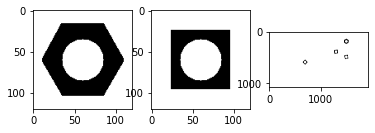

In [3]:
kernel = cv.getStructuringElement(cv.MORPH_RECT, (3,3))
closing_hexa = cv.morphologyEx(th_hexa, cv.MORPH_CLOSE, kernel)
closing_sqre = cv.morphologyEx(th_sqre, cv.MORPH_CLOSE, kernel)
closing_conv = cv.morphologyEx(th_conv, cv.MORPH_CLOSE, kernel)
fig, ax = plt. subplots(1,3)
ax[0].imshow(closing_hexa,'gray')
ax[1].imshow(closing_sqre,'gray')
ax[2].imshow(closing_conv,'gray')
plt.show()

## 4.Connected components analysis.

In [6]:
Images=['hexnut template','squarenut template','convayor belt']
def connected_comp_stats(im_array):
    connectivity=4
    Output=cv.connectedComponentsWithStats(im_array,connectivity,cv.CV_32S)
    num_labels,labels,stats,centroids=Output
    print("Connected components analysis of",Images[0],"image.\nNumber of connected components :-",num_labels)
    for i in range(num_labels):
        x = stats[i, cv.CC_STAT_LEFT]
        y = stats[i, cv.CC_STAT_TOP]
        w = stats[i, cv.CC_STAT_WIDTH]
        h = stats[i, cv.CC_STAT_HEIGHT]
        area = stats[i, cv.CC_STAT_AREA]
        (cX, cY) = centroids[i]
        print("\tObject %d"%i)
        print("\t\tStarting (x,y) coordinates of the object is (%d,%d)."%(x,y))
        print("\t\tThe width of object is %d"%w)
        print("\t\tThe height of object is %d"%h)
        print("\t\tThe area of the object is %d"%area)
        print("\t\tThe centroid (x,y) is at (%f,%f)"%(cX,cY))
connected_comp_stats(th_hexa)
connected_comp_stats(th_sqre)
connected_comp_stats(th_conv)


Connected components analysis of hexnut template image.
Number of connected components :- 3
	Object 0
		Starting (x,y) coordinates of the object is (10,16).
		The width of object is 101
		The height of object is 88
		The area of the object is 4724
		The centroid (x,y) is at (59.833616,59.222904)
	Object 1
		Starting (x,y) coordinates of the object is (0,0).
		The width of object is 120
		The height of object is 120
		The area of the object is 7715
		The centroid (x,y) is at (59.168633,59.542579)
	Object 2
		Starting (x,y) coordinates of the object is (35,35).
		The width of object is 51
		The height of object is 51
		The area of the object is 1961
		The centroid (x,y) is at (60.000000,60.000000)
Connected components analysis of hexnut template image.
Number of connected components :- 3
	Object 0
		Starting (x,y) coordinates of the object is (24,24).
		The width of object is 72
		The height of object is 72
		The area of the object is 3223
		The centroid (x,y) is at (59.195780,59.195780)

## 5.Contour analysis: Use findContours function to retrieve the extreme outer contours.

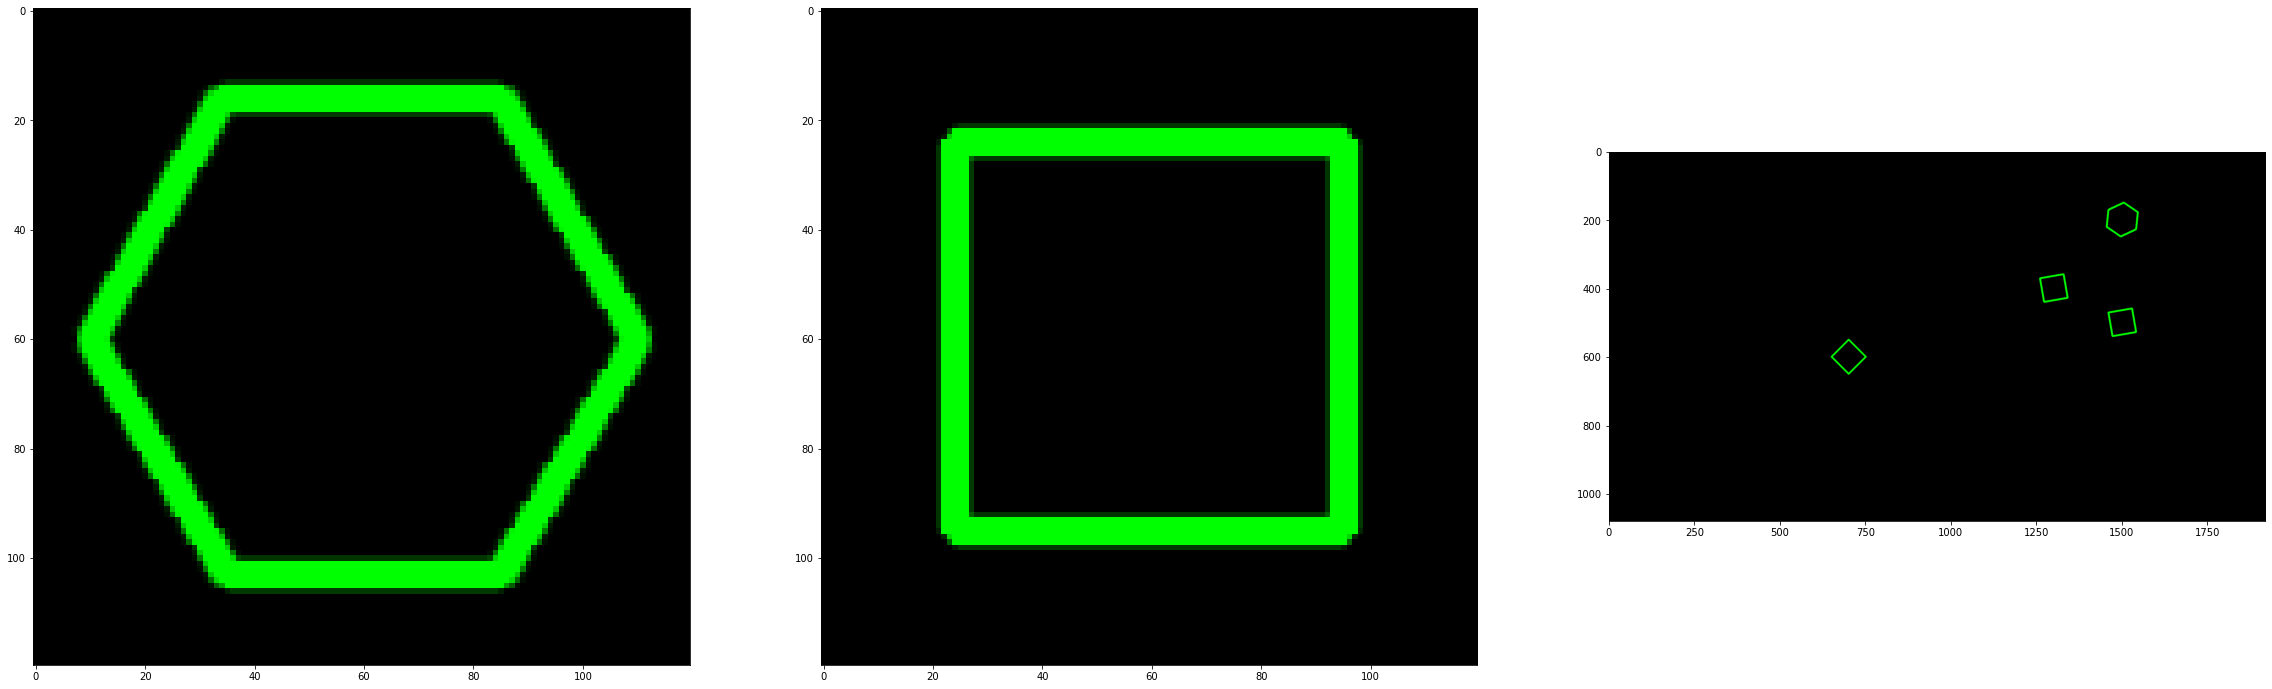

In [5]:
fig, ax = plt. subplots(1,3,figsize=(40,15))
def Contour_Finding(im_array,ind):
    contours1= cv.findContours(255-im_array, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)[0]
    background=np.zeros((im_array.shape[0],im_array.shape[1],3)).astype('uint8')

    cv.drawContours(background, contours1, -1, (0,255,0),3, cv.LINE_AA)
    ax[ind].imshow(background)
    plt.imshow(background)
Contour_Finding(th_hexa,0)
Contour_Finding(th_sqre,1)
Contour_Finding(th_conv,2)

## __Detecting Objects on a Synthetic Conveyor__

## 1.Open the sequence and play it

In [6]:
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')
f = 0
frame = []      
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    f += 1
    text = 'Frame:' + str(f)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.imshow('Conveyor', frame)

    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.


## 2.Count the number of matching hexagonal nuts in conveyor_f100.png. 

Number of matching hexagonal nuts in conveyor_f100.png is 1.


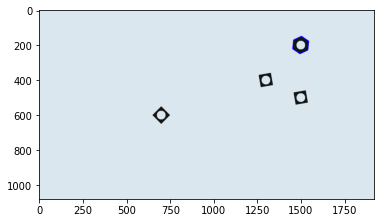

In [7]:
contour_hex= cv.findContours(255-th_hexa, cv.RETR_EXTERNAL,1)[0]
cnt_hex=contour_hex[0]
contours_in_conv= cv.findContours(255-th_conv, cv.RETR_EXTERNAL,1)[0]

count_hex=0
Matches=[]

for i in range(len(contours_in_conv)):
    cnt=contours_in_conv[i]
    ret = cv.matchShapes(cnt_hex,cnt,1,0.0)
    if ret<0.002:
        count_hex+=1
        Matches.append(cnt)
print( "Number of matching hexagonal nuts in conveyor_f100.png is %d."%count_hex)

im=conveyor_f100
cv.drawContours(im, Matches, -1, (0,0,255),3, cv.LINE_AA)
fig, ax = plt. subplots(1,1)
ax.imshow(im)
plt.show()


## 3.Count the number of objects that were conveyed along the conveyor belt.

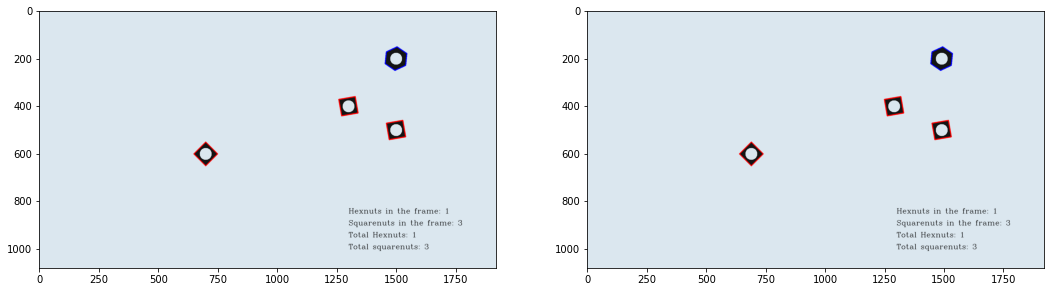

In [10]:
def countObjects(in_frame_array, out_frame_array):
    prev_hex=0
    prev_sqre=0
    tot_hex=0
    tot_sqre=0
    contour_hex= cv.findContours(255-th_hexa, cv.RETR_EXTERNAL,1)[0]
    cnt_hex=contour_hex[0]
    contour_sqre= cv.findContours(255-th_sqre, cv.RETR_EXTERNAL,1)[0]
    cnt_sqre=contour_sqre[0]


    for i in range(len(in_frame_array)):
        current_hex=0
        current_sqre=0
        current_frame=in_frame_array[i].copy()
        Gray_conveyor=cv.cvtColor(in_frame_array[i],cv.COLOR_RGB2GRAY)
        th_conv = cv.threshold(Gray_conveyor,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)[1]
        Output=cv.connectedComponentsWithStats(th_conv,4,cv.CV_32S)
        W_by_2=in_frame_array[i].shape[1]//2
        c=0
        for i in range(Output[0]):
                x = Output[2][i, cv.CC_STAT_LEFT]
                if x>W_by_2:
                    c=1
        contours_in_conv= cv.findContours(255-th_conv, cv.RETR_EXTERNAL,1)[0]
        for j in range(len(contours_in_conv)):
            cnt=contours_in_conv[j]
            ret_hex = cv.matchShapes(cnt_hex,cnt,1,0.0)
            ret_sqre= cv.matchShapes(cnt_sqre,cnt,1,0.0)
            if ret_hex<0.002:
                current_hex+=1
                cv.drawContours(current_frame, cnt, -1, (0,0,255),3, cv.LINE_AA)
            if ret_sqre<0.002:
                current_sqre+=1
                cv.drawContours(current_frame, cnt, -1, (255,0,0),3, cv.LINE_AA)
        if current_hex> prev_hex and c:
            tot_hex+=current_hex-prev_hex
        if current_sqre>prev_sqre and c:
            tot_sqre +=current_sqre-prev_sqre
        cv.putText( current_frame, f"Hexnuts in the frame: {current_hex}", (1300, 850), cv.FONT_HERSHEY_COMPLEX, 1, (0,0,0), 1, cv.LINE_AA )
        cv.putText(current_frame, f"Squarenuts in the frame: {current_sqre}", (1300, 900), cv.FONT_HERSHEY_COMPLEX, 1, (0,0,0), 1, cv.LINE_AA )
        cv.putText( current_frame, f"Total Hexnuts: {tot_hex}", (1300, 950), cv.FONT_HERSHEY_COMPLEX, 1, (0,0,0), 1, cv.LINE_AA )
        cv.putText( current_frame, f"Total squarenuts: {tot_sqre}", (1300, 1000), cv.FONT_HERSHEY_COMPLEX, 1, (0,0,0), 1, cv.LINE_AA )
        prev_hex = current_hex
        prev_sqre = current_sqre
        out_frame_array.append(current_frame[:, :, :])

conveyor_f100 =  cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)        
conveyor_f101 =  cv.imread('conveyor_f101.png', cv.IMREAD_COLOR)  
in_frame_array = [conveyor_f100, conveyor_f101]
out_frame_array = []


countObjects(in_frame_array, out_frame_array)

fig, ax = plt.subplots(1, 2, figsize = (18, 9))
ax[0].imshow(out_frame_array[0])
ax[1].imshow(out_frame_array[1])

# Writing the video

frame_array = []
shape = (1080, 1920, 3)
countObjects(in_frame_array, frame_array)

# # Your code here


out = cv.VideoWriter('images/conveyor_results.mp4',cv.VideoWriter_fourcc(*'h264'), 30, (shape[1], shape[0]))
 
for i in range(len(frame_array)):
    cv.imshow('Frame', frame_array[i])
    if cv.waitKey(1) == ord('q'):
        break
    out.write(frame_array[i])

out.release()
cv.destroyAllWindows()

In [11]:
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')
f = 0
frame = []    
A=[]  
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    f += 1
    text = 'Frame:' + str(f)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)

    cv.imshow('Conveyor', frame)
    A.append(frame)
    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()
print(len(A))
frame_array=[]
countObjects(A, frame_array)
print('finished')

Can't receive frame (stream end?). Exiting.
380
finished


In [19]:
out = cv.VideoWriter('conveyor_results.mp4',cv.VideoWriter_fourcc(*'h264'), 30, (shape[1], shape[0]))
 
for i in range(len(frame_array)):
    cv.imshow('Frame', frame_array[i])
    if cv.waitKey(1) == ord('q'):
        break
    out.write(frame_array[i])

out.release()
cv.destroyAllWindows()